In [69]:
import os
import numpy as np
import torch
import util
import matplotlib.pyplot as plt
from data import fr
from torch.autograd.gradcheck import zero_gradients
%matplotlib inline
from utils_project import *
from data.data import gen_signal
# three outputs from this function: signal [num_samples, 2, signal_dim]; frequency (float)[num_samples, num_freq];
# num_freq:int [num_samples] 
from data.noise import noise_torch
from data import fr
# find nearest
import matplotlib.backends.backend_pdf

fr_path = 'checkpoint/model_snr_range_1_bias_no/fr/epoch_400.pth'
fc_path = 'checkpoint/model_snr_range_1_50_bias_no/fc/epoch_300.pth'
data_dir = 'test_dataset'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#load models
fr_module, _, _, _, _ = util.load(fr_path, 'fr', device)
fr_module.cpu()
fr_module.eval()
xgrid = np.linspace(-0.5, 0.5, fr_module.fr_size, endpoint=False)

#load data
f = np.load(os.path.join(data_dir, 'f.npy'))
signal_0dB = np.load(os.path.join(data_dir, '0.0dB.npy'))
signal_10dB = np.load(os.path.join(data_dir, '10.0dB.npy'))
signal_50dB = np.load(os.path.join(data_dir, '50.0dB.npy'))
nfreq = nfreq = np.sum(f >= -0.5, axis=1)


In [74]:
# hyper parameter setting
num_samples=20
signal_dim=50
min_sep=1.
snr_list=[1, 5, 10, 30, 50]
#fixed_freq = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4] # set None for  random frequency
fixed_freq = [0.3, 0.4]
num_freq=len(fixed_freq)
snr=50
jac, jac_clean = compute_jacobian_realization(
    fr_module,
    num_samples, 
    signal_dim, 
    num_freq, 
    min_sep, 
    fixed_freq, 
    snr)
jac = np.stack(jac)


KeyboardInterrupt: 

In [100]:
clean_signals, signal_frs, signal_num_freqs = gen_signal(num_samples=num_samples, 
                                                         signal_dim=signal_dim, 
                                                         num_freq=num_freq, min_sep=min_sep,
                                                        fixed_freq=fixed_freq)
noisy_signals = noise_torch(torch.as_tensor(clean_signals), snr, 'gaussian')

In [75]:
jac_clean = np.stack(jac_clean)

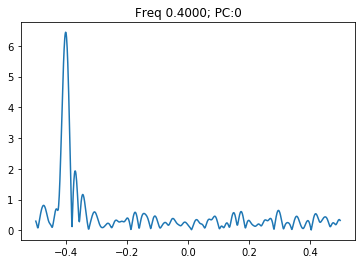

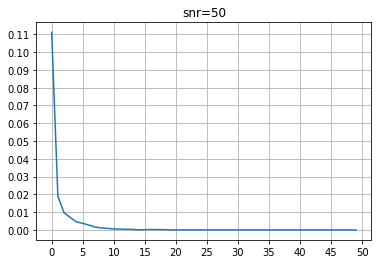

In [78]:
fig, ax, s, u = pca_plots(jac, fixed_freq, num_samples, signal_dim, idx_comp=0, fixed_freq_idx=1)
plt.figure()
plt.plot(np.abs(s))
plt.title('snr={}'.format(snr))
plt.locator_params(nbins=15)
plt.grid()

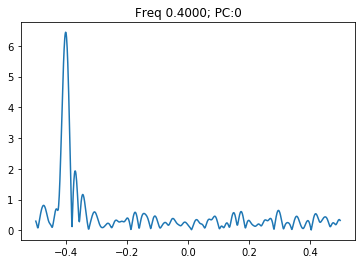

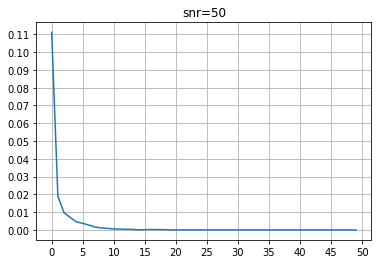

In [72]:
fig, ax, s, u = pca_plots(jac, fixed_freq, num_samples, signal_dim, idx_comp=0, fixed_freq_idx=1)
plt.figure()
plt.plot(np.abs(s))
plt.title('snr={}'.format(snr))
plt.locator_params(nbins=15)
plt.grid()

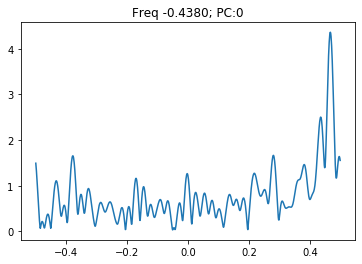

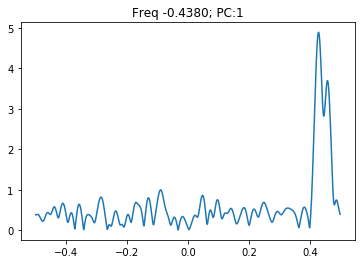

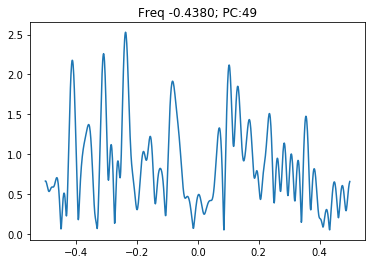

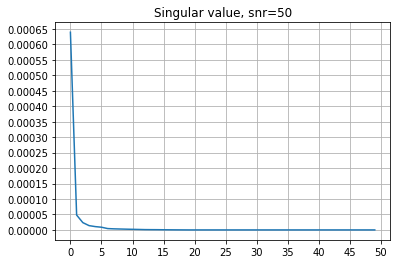

In [99]:
arbitary_row=62
for idx_comp in [0,1,49]:
    fig, ax, s, u = pca_plots(jac, fixed_freq, num_samples, signal_dim, idx_comp=idx_comp, fixed_freq_idx=1,arbitary_row=arbitary_row)
plt.figure()
plt.plot(np.abs(s))
plt.title('Singular value, snr={}'.format(snr))
plt.locator_params(nbins=15)
plt.grid()

In [67]:
eigenvalues = []
for row_idx in range(0, 999, 1):
    _, _, s, u = pca_plots(jac, fixed_freq, num_samples, signal_dim, idx_comp=0, fixed_freq_idx=1,arbitary_row=row_idx)
    eigenvalues.append(s)
    plt.close()
eigenvalues  = np.stack(eigenvalues)

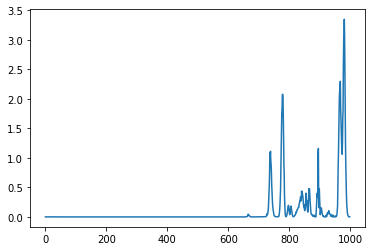

In [68]:
plt.figure()
plt.plot(np.abs(eigenvalues.T[0]))

In [101]:
noisy_signals = noisy_signals.cpu().numpy()
noisy_signals_c = noisy_signals[:, 0] + 1j * noisy_signals[:, 1]

In [102]:
periodogram = fr.periodogram(noisy_signals_c, xgrid)

In [104]:
periodogram.shape

(20, 1000)

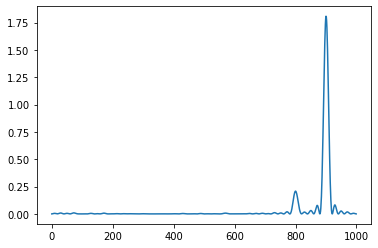

In [111]:
plt.figure()
plt.plot(periodogram[6])